In [1]:
import pandas as pd
import numpy as np

In [2]:
population=pd.read_csv("country_population.csv")
lifexp=pd.read_csv("life_expectancy.csv")
fertility=pd.read_csv("fertility_rate.csv")
metadata=pd.read_csv("Metadata_Country.csv")

In [3]:
population.head()

Country Name Country Code     Indicator Name Indicator Code       1960  \
0        Aruba          ABW  Population, total    SP.POP.TOTL    54211.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  8996351.0   
2       Angola          AGO  Population, total    SP.POP.TOTL  5643182.0   
3      Albania          ALB  Population, total    SP.POP.TOTL  1608800.0   
4      Andorra          AND  Population, total    SP.POP.TOTL    13411.0   

        1961       1962       1963       1964       1965  ...        2007  \
0    55438.0    56225.0    56695.0    57032.0    57360.0  ...    101220.0   
1  9166764.0  9345868.0  9533954.0  9731361.0  9938414.0  ...  26616792.0   
2  5753024.0  5866061.0  5980417.0  6093321.0  6203299.0  ...  20997687.0   
3  1659800.0  1711319.0  1762621.0  1814135.0  1864791.0  ...   2970017.0   
4    14375.0    15370.0    16412.0    17469.0    18549.0  ...     82683.0   

         2008        2009        2010        2011        2012        2013  \
0    101353.0    101453.0    101669.0    102053.0    102577.0    103187.0   
1  27294031.0  28004331.0  28803167.0  29708599.0  30696958.0  31731688.0   
2  21759420.0  22549547.0  23369131.0  24218565.0  25096150.0  25998340.0   
3   2947314.0   2927519.0   2913021.0   2905195.0   2900401.0   2895092.0   
4     83861.0     84462.0     84449.0     83751.0     82431.0     80788.0   

         2014        2015        2016  
0    103795.0    104341.0    104822.0  
1  32758020.0  33736494.0  34656032.0  
2  26920466.0  27859305.0  28813463.0  
3   2889104.0   2880703.0   2876101.0  
4     79223.0     78014.0     77281.0  

[5 rows x 61 columns]

In [4]:
population.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2012              2
2013              2
2014              2
2015              2
2016              2
Length: 61, dtype: int64

In [5]:
population.shape

(264, 61)

In [6]:
population.loc[population.isnull().any(axis=1)]

Country Name Country Code     Indicator Name Indicator Code  \
67                     Eritrea          ERI  Population, total    SP.POP.TOTL   
108             Not classified          INX  Population, total    SP.POP.TOTL   
125                     Kuwait          KWT  Population, total    SP.POP.TOTL   
194         West Bank and Gaza          PSE  Population, total    SP.POP.TOTL   
212                     Serbia          SRB  Population, total    SP.POP.TOTL   
223  Sint Maarten (Dutch part)          SXM  Population, total    SP.POP.TOTL   

          1960       1961       1962       1963       1964       1965  ...  \
67   1397491.0  1432640.0  1469645.0  1508273.0  1548187.0  1589179.0  ...   
108        NaN        NaN        NaN        NaN        NaN        NaN  ...   
125   269618.0   301336.0   338296.0   379891.0   425235.0   473554.0  ...   
194        NaN        NaN        NaN        NaN        NaN        NaN  ...   
212        NaN        NaN        NaN        NaN        NaN        NaN  ...   
223        NaN        NaN        NaN        NaN        NaN        NaN  ...   

          2007       2008       2009       2010       2011       2012  \
67   4153332.0  4232636.0  4310334.0  4390840.0  4474690.0        NaN   
108        NaN        NaN        NaN        NaN        NaN        NaN   
125  2503410.0  2652340.0  2818939.0  2998083.0  3191051.0  3395556.0   
194  3494496.0  3596688.0  3702218.0  3811102.0  3927051.0  4046901.0   
212  7381579.0  7350222.0  7320807.0  7291436.0  7234099.0  7199077.0   
223    39462.0    40458.0    39133.0    35474.0    33435.0    34640.0   

          2013       2014       2015       2016  
67         NaN        NaN        NaN        NaN  
108        NaN        NaN        NaN        NaN  
125  3598385.0  3782450.0  3935794.0  4052584.0  
194  4169506.0  4294682.0  4422143.0  4551566.0  
212  7164132.0  7130576.0  7095383.0  7058322.0  
223    36607.0    37685.0    38824.0    39969.0  

[6 rows x 61 columns]

In [7]:
population[population.duplicated()]

Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Index: []

[0 rows x 61 columns]

In [8]:
population.drop(columns=["Indicator Name","Indicator Code"],inplace=True)

In [9]:
population

Country Name Country Code        1960        1961        1962  \
0           Aruba          ABW     54211.0     55438.0     56225.0   
1     Afghanistan          AFG   8996351.0   9166764.0   9345868.0   
2          Angola          AGO   5643182.0   5753024.0   5866061.0   
3         Albania          ALB   1608800.0   1659800.0   1711319.0   
4         Andorra          AND     13411.0     14375.0     15370.0   
..            ...          ...         ...         ...         ...   
259        Kosovo          XKX    947000.0    966000.0    994000.0   
260   Yemen, Rep.          YEM   5172135.0   5260501.0   5351799.0   
261  South Africa          ZAF  17456855.0  17920673.0  18401608.0   
262        Zambia          ZMB   3044846.0   3140264.0   3240587.0   
263      Zimbabwe          ZWE   3747369.0   3870756.0   3999419.0   

           1963        1964        1965        1966        1967  ...  \
0       56695.0     57032.0     57360.0     57715.0     58055.0  ...   
1     9533954.0   9731361.0   9938414.0  10152331.0  10372630.0  ...   
2     5980417.0   6093321.0   6203299.0   6309770.0   6414995.0  ...   
3     1762621.0   1814135.0   1864791.0   1914573.0   1965598.0  ...   
4       16412.0     17469.0     18549.0     19647.0     20758.0  ...   
..          ...         ...         ...         ...         ...  ...   
259   1022000.0   1050000.0   1078000.0   1106000.0   1135000.0  ...   
260   5446063.0   5543339.0   5643643.0   5748588.0   5858638.0  ...   
261  18899275.0  19412975.0  19942303.0  20486439.0  21045785.0  ...   
262   3345145.0   3452942.0   3563407.0   3676189.0   3791887.0  ...   
263   4132756.0   4269863.0   4410212.0   4553433.0   4700041.0  ...   

           2007        2008        2009        2010        2011        2012  \
0      101220.0    101353.0    101453.0    101669.0    102053.0    102577.0   
1    26616792.0  27294031.0  28004331.0  28803167.0  29708599.0  30696958.0   
2    20997687.0  21759420.0  22549547.0  23369131.0  24218565.0  25096150.0   
3     2970017.0   2947314.0   2927519.0   2913021.0   2905195.0   2900401.0   
4       82683.0     83861.0     84462.0     84449.0     83751.0     82431.0   
..          ...         ...         ...         ...         ...         ...   
259   1733404.0   1747383.0   1761474.0   1775680.0   1791000.0   1805200.0   
260  21751605.0  22356391.0  22974929.0  23606779.0  24252206.0  24909969.0   
261  49887181.0  50412129.0  50970818.0  51584663.0  52263516.0  52998213.0   
262  12725974.0  13082517.0  13456417.0  13850033.0  14264756.0  14699937.0   
263  13329909.0  13558469.0  13810599.0  14086317.0  14386649.0  14710826.0   

           2013        2014        2015        2016  
0      103187.0    103795.0    104341.0    104822.0  
1    31731688.0  32758020.0  33736494.0  34656032.0  
2    25998340.0  26920466.0  27859305.0  28813463.0  
3     2895092.0   2889104.0   2880703.0   2876101.0  
4       80788.0     79223.0     78014.0     77281.0  
..          ...         ...         ...         ...  
259   1824100.0   1821800.0   1801800.0   1816200.0  
260  25576322.0  26246327.0  26916207.0  27584213.0  
261  53767396.0  54539571.0  55291225.0  56015473.0  
262  15153210.0  15620974.0  16100587.0  16591390.0  
263  15054506.0  15411675.0  15777451.0  16150362.0  

[264 rows x 59 columns]

In [10]:
population.shape

(264, 59)

## using melt function

In [11]:
df=pd.melt(population,id_vars=["Country Name","Country Code"],value_vars=population.columns[2:],value_name="population",var_name="year")

In [12]:
df

Country Name Country Code  year  population
0             Aruba          ABW  1960     54211.0
1       Afghanistan          AFG  1960   8996351.0
2            Angola          AGO  1960   5643182.0
3           Albania          ALB  1960   1608800.0
4           Andorra          AND  1960     13411.0
...             ...          ...   ...         ...
15043        Kosovo          XKX  2016   1816200.0
15044   Yemen, Rep.          YEM  2016  27584213.0
15045  South Africa          ZAF  2016  56015473.0
15046        Zambia          ZMB  2016  16591390.0
15047      Zimbabwe          ZWE  2016  16150362.0

[15048 rows x 4 columns]

In [13]:
df.isnull().sum()

Country Name      0
Country Code      0
year              0
population      163
dtype: int64

In [14]:
df[df.isna().any(axis=1)]

Country Name Country Code  year  population
108               Not classified          INX  1960         NaN
194           West Bank and Gaza          PSE  1960         NaN
212                       Serbia          SRB  1960         NaN
223    Sint Maarten (Dutch part)          SXM  1960         NaN
372               Not classified          INX  1961         NaN
...                          ...          ...   ...         ...
14364             Not classified          INX  2014         NaN
14587                    Eritrea          ERI  2015         NaN
14628             Not classified          INX  2015         NaN
14851                    Eritrea          ERI  2016         NaN
14892             Not classified          INX  2016         NaN

[163 rows x 4 columns]

In [15]:
df.dropna(inplace=True)

In [16]:
df

Country Name Country Code  year  population
0             Aruba          ABW  1960     54211.0
1       Afghanistan          AFG  1960   8996351.0
2            Angola          AGO  1960   5643182.0
3           Albania          ALB  1960   1608800.0
4           Andorra          AND  1960     13411.0
...             ...          ...   ...         ...
15043        Kosovo          XKX  2016   1816200.0
15044   Yemen, Rep.          YEM  2016  27584213.0
15045  South Africa          ZAF  2016  56015473.0
15046        Zambia          ZMB  2016  16591390.0
15047      Zimbabwe          ZWE  2016  16150362.0

[14885 rows x 4 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14885 entries, 0 to 15047
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  14885 non-null  object 
 1   Country Code  14885 non-null  object 
 2   year          14885 non-null  object 
 3   population    14885 non-null  float64
dtypes: float64(1), object(3)
memory usage: 581.4+ KB


In [18]:
lifexp.head()

Country Name Country Code                           Indicator Name  \
0        Aruba          ABW  Life expectancy at birth, total (years)   
1  Afghanistan          AFG  Life expectancy at birth, total (years)   
2       Angola          AGO  Life expectancy at birth, total (years)   
3      Albania          ALB  Life expectancy at birth, total (years)   
4      Andorra          AND  Life expectancy at birth, total (years)   

   Indicator Code    1960    1961    1962    1963    1964    1965  ...  \
0  SP.DYN.LE00.IN  65.662  66.074  66.444  66.787  67.113  67.435  ...   
1  SP.DYN.LE00.IN  32.292  32.742  33.185  33.624  34.060  34.495  ...   
2  SP.DYN.LE00.IN  33.251  33.573  33.914  34.272  34.645  35.031  ...   
3  SP.DYN.LE00.IN  62.279  63.298  64.187  64.911  65.461  65.848  ...   
4  SP.DYN.LE00.IN     NaN     NaN     NaN     NaN     NaN     NaN  ...   

     2007    2008    2009    2010    2011    2012    2013    2014    2015  \
0  74.576  74.725  74.872  75.016  75.158  75.299  75.440  75.582  75.725   
1  59.694  60.243  60.754  61.226  61.666  62.086  62.494  62.895  63.288   
2  55.096  56.189  57.231  58.192  59.042  59.770  60.373  60.858  61.241   
3  75.656  75.943  76.281  76.652  77.031  77.389  77.702  77.963  78.174   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

     2016  
0  75.867  
1  63.673  
2  61.547  
3  78.345  
4     NaN  

[5 rows x 61 columns]

In [19]:
lifexp.shape

(264, 61)

In [20]:
lifexp.isnull().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
1960              29
                  ..
2012              17
2013              19
2014              19
2015              20
2016              19
Length: 61, dtype: int64

In [21]:
lifexp.loc[lifexp.isnull().any(axis=1)]

Country Name Country Code  \
4                      Andorra          AND   
9               American Samoa          ASM   
25                     Bermuda          BMU   
49                     Curacao          CUW   
50              Cayman Islands          CYM   
55                    Dominica          DMA   
76               Faroe Islands          FRO   
82                   Gibraltar          GIB   
89                   Greenland          GRL   
106                Isle of Man          IMN   
108             Not classified          INX   
113                     Israel          ISR   
123        St. Kitts and Nevis          KNA   
135              Liechtenstein          LIE   
145   St. Martin (French part)          MAF   
147                     Monaco          MCO   
153           Marshall Islands          MHL   
162   Northern Mariana Islands          MNP   
177                      Nauru          NRU   
186                      Palau          PLW   
194         West Bank and Gaza          PSE   
210                 San Marino          SMR   
212                     Serbia          SRB   
223  Sint Maarten (Dutch part)          SXM   
224                 Seychelles          SYC   
226   Turks and Caicos Islands          TCA   
243                     Tuvalu          TUV   
253     British Virgin Islands          VGB   
259                     Kosovo          XKX   

                              Indicator Name  Indicator Code  1960       1961  \
4    Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
9    Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
25   Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
49   Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
50   Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
55   Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
76   Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
82   Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
89   Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
106  Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
108  Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
113  Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN  72.006585   
123  Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
135  Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
145  Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
147  Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
153  Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
162  Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
177  Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
186  Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
194  Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
210  Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
212  Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
223  Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
224  Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
226  Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
243  Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
253  Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   
259  Life expectancy at birth, total (years)  SP.DYN.LE00.IN   NaN        NaN   

          1962  1963  1964       1965  ...       2007       2008       2009  \
4          NaN   NaN   NaN        NaN  ...        NaN        NaN        NaN   
9          NaN   N

In [22]:
lifexp["1960"].mean()

53.367005386120745

In [23]:
lifexp.shape

(264, 61)

In [24]:
lifexp.drop(columns=['Indicator Name',"Indicator Code"],inplace =True)

In [25]:
df2=pd.melt(lifexp,id_vars=['Country Name',"Country Code"],value_vars=lifexp.columns[2:],var_name="year",value_name="lifexp_rate")

In [26]:
df2[df2.isnull().any(axis=1)]

Country Name Country Code  year  lifexp_rate
4                        Andorra          AND  1960          NaN
9                 American Samoa          ASM  1960          NaN
25                       Bermuda          BMU  1960          NaN
49                       Curacao          CUW  1960          NaN
50                Cayman Islands          CYM  1960          NaN
...                          ...          ...   ...          ...
14994                 San Marino          SMR  2016          NaN
15007  Sint Maarten (Dutch part)          SXM  2016          NaN
15010   Turks and Caicos Islands          TCA  2016          NaN
15027                     Tuvalu          TUV  2016          NaN
15037     British Virgin Islands          VGB  2016          NaN

[1301 rows x 4 columns]

In [27]:
df2.dropna(inplace=True)

In [28]:
df2

Country Name Country Code  year  lifexp_rate
0             Aruba          ABW  1960    65.662000
1       Afghanistan          AFG  1960    32.292000
2            Angola          AGO  1960    33.251000
3           Albania          ALB  1960    62.279000
5        Arab World          ARB  1960    46.825065
...             ...          ...   ...          ...
15043        Kosovo          XKX  2016    71.646341
15044   Yemen, Rep.          YEM  2016    64.953000
15045  South Africa          ZAF  2016    62.774000
15046        Zambia          ZMB  2016    61.874000
15047      Zimbabwe          ZWE  2016    61.163000

[13747 rows x 4 columns]

In [29]:
fertility.head()

Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  Fertility rate, total (births per woman)   
1  Afghanistan          AFG  Fertility rate, total (births per woman)   
2       Angola          AGO  Fertility rate, total (births per woman)   
3      Albania          ALB  Fertility rate, total (births per woman)   
4      Andorra          AND  Fertility rate, total (births per woman)   

   Indicator Code   1960   1961   1962   1963   1964   1965  ...   2007  \
0  SP.DYN.TFRT.IN  4.820  4.655  4.471  4.271  4.059  3.842  ...  1.763   
1  SP.DYN.TFRT.IN  7.450  7.450  7.450  7.450  7.450  7.450  ...  6.460   
2  SP.DYN.TFRT.IN  7.478  7.524  7.563  7.592  7.611  7.619  ...  6.368   
3  SP.DYN.TFRT.IN  6.489  6.401  6.282  6.133  5.960  5.773  ...  1.668   
4  SP.DYN.TFRT.IN    NaN    NaN    NaN    NaN    NaN    NaN  ...  1.180   

    2008   2009   2010   2011   2012   2013   2014   2015   2016  
0  1.764  1.769  1.776  1.783  1.791  1.796  1.800  1.801  1.800  
1  6.254  6.038  5.816  5.595  5.380  5.174  4.981  4.802  4.635  
2  6.307  6.238  6.162  6.082  6.000  5.920  5.841  5.766  5.694  
3  1.650  1.646  1.653  1.668  1.685  1.700  1.710  1.714  1.713  
4  1.250  1.190  1.270    NaN    NaN    NaN    NaN    NaN    NaN  

[5 rows x 61 columns]

In [30]:
fertility.isnull().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
1960              28
                  ..
2012              16
2013              18
2014              18
2015              17
2016              18
Length: 61, dtype: int64

In [31]:
fertility[fertility.isnull().any(axis=1)]

Country Name Country Code  \
4                      Andorra          AND   
9               American Samoa          ASM   
25                     Bermuda          BMU   
49                     Curacao          CUW   
50              Cayman Islands          CYM   
55                    Dominica          DMA   
76               Faroe Islands          FRO   
82                   Gibraltar          GIB   
89                   Greenland          GRL   
106                Isle of Man          IMN   
108             Not classified          INX   
123        St. Kitts and Nevis          KNA   
135              Liechtenstein          LIE   
142                 Luxembourg          LUX   
145   St. Martin (French part)          MAF   
147                     Monaco          MCO   
153           Marshall Islands          MHL   
162   Northern Mariana Islands          MNP   
177                      Nauru          NRU   
186                      Palau          PLW   
194         West Bank and Gaza          PSE   
210                 San Marino          SMR   
212                     Serbia          SRB   
223  Sint Maarten (Dutch part)          SXM   
224                 Seychelles          SYC   
226   Turks and Caicos Islands          TCA   
243                     Tuvalu          TUV   
253     British Virgin Islands          VGB   
259                     Kosovo          XKX   

                               Indicator Name  Indicator Code  1960   1961  \
4    Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
9    Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
25   Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
49   Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
50   Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
55   Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
76   Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
82   Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
89   Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
106  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN  2.707   
108  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
123  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
135  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
142  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  2.29    NaN   
145  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
147  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
153  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
162  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
177  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
186  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
194  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
210  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
212  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN  2.500   
223  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
224  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
226  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
243  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
253  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   
259  Fertility rate, total (births per woman)  SP.DYN.TFRT.IN   NaN    NaN   

     1962  1963  1964  1965  ...   2007   2008   2009   2010   2011   2012  \
4     NaN   NaN   NaN   NaN  ...  1.180  1.250  1.190  1.270    NaN    NaN   
9     NaN   NaN   NaN   NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
25    NaN   NaN   NaN   NaN  ...

In [32]:
fertility.loc[fertility.duplicated()]

Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Index: []

[0 rows x 61 columns]

In [33]:
fertility.drop(columns=["Indicator Name","Indicator Code"],inplace =True)

In [34]:
fertility.head()

Country Name Country Code   1960   1961   1962   1963   1964   1965   1966  \
0        Aruba          ABW  4.820  4.655  4.471  4.271  4.059  3.842  3.625   
1  Afghanistan          AFG  7.450  7.450  7.450  7.450  7.450  7.450  7.450   
2       Angola          AGO  7.478  7.524  7.563  7.592  7.611  7.619  7.618   
3      Albania          ALB  6.489  6.401  6.282  6.133  5.960  5.773  5.581   
4      Andorra          AND    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

    1967  ...   2007   2008   2009   2010   2011   2012   2013   2014   2015  \
0  3.417  ...  1.763  1.764  1.769  1.776  1.783  1.791  1.796  1.800  1.801   
1  7.450  ...  6.460  6.254  6.038  5.816  5.595  5.380  5.174  4.981  4.802   
2  7.613  ...  6.368  6.307  6.238  6.162  6.082  6.000  5.920  5.841  5.766   
3  5.394  ...  1.668  1.650  1.646  1.653  1.668  1.685  1.700  1.710  1.714   
4    NaN  ...  1.180  1.250  1.190  1.270    NaN    NaN    NaN    NaN    NaN   

    2016  
0  1.800  
1  4.635  
2  5.694  
3  1.713  
4    NaN  

[5 rows x 59 columns]

In [35]:
fertility.shape

(264, 59)

In [36]:
df3=pd.melt(fertility,id_vars=["Country Name","Country Code"],value_vars=fertility.columns[2:],var_name="year",value_name="Fertility_Rate")

In [37]:
df3

Country Name Country Code  year  Fertility_Rate
0             Aruba          ABW  1960           4.820
1       Afghanistan          AFG  1960           7.450
2            Angola          AGO  1960           7.478
3           Albania          ALB  1960           6.489
4           Andorra          AND  1960             NaN
...             ...          ...   ...             ...
15043        Kosovo          XKX  2016           2.060
15044   Yemen, Rep.          YEM  2016           3.995
15045  South Africa          ZAF  2016           2.458
15046        Zambia          ZMB  2016           4.981
15047      Zimbabwe          ZWE  2016           3.760

[15048 rows x 4 columns]

In [38]:
df3.isnull().sum()

Country Name         0
Country Code         0
year                 0
Fertility_Rate    1278
dtype: int64

In [39]:
df3.dropna(inplace=True)

In [40]:
df3.shape

(13770, 4)

In [41]:
metadata.head(10)

Country Code                      Region          IncomeGroup  \
0          ABW   Latin America & Caribbean          High income   
1          AFG                  South Asia           Low income   
2          AGO          Sub-Saharan Africa  Lower middle income   
3          ALB       Europe & Central Asia  Upper middle income   
4          AND       Europe & Central Asia          High income   
5          ARB                         NaN                  NaN   
6          ARE  Middle East & North Africa          High income   
7          ARG   Latin America & Caribbean  Upper middle income   
8          ARM       Europe & Central Asia  Lower middle income   
9          ASM         East Asia & Pacific  Upper middle income   

                                        SpecialNotes             TableName  \
0  SNA data for 2000-2011 are updated from offici...                 Aruba   
1  Fiscal year end: March 20; reporting period fo...           Afghanistan   
2                                                NaN                Angola   
3                                                NaN               Albania   
4  WB-3 code changed from ADO to AND to align wit...               Andorra   
5  Arab World aggregate. Arab World is composed o...            Arab World   
6                                                NaN  United Arab Emirates   
7  National Institute of Statistics and Census re...             Argentina   
8                                                NaN               Armenia   
9                                 New base Year 2009        American Samoa   

   Unnamed: 5  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  
6         NaN  
7         NaN  
8         NaN  
9         NaN

In [42]:
metadata.isnull().sum()

Country Code      0
Region           46
IncomeGroup      46
SpecialNotes    116
TableName         0
Unnamed: 5      263
dtype: int64

In [43]:
metadata.shape

(263, 6)

In [44]:
metadata.drop(columns=["SpecialNotes","Unnamed: 5","TableName","IncomeGroup"],inplace=True)

In [45]:
metadata.head()

Country Code                     Region
0          ABW  Latin America & Caribbean
1          AFG                 South Asia
2          AGO         Sub-Saharan Africa
3          ALB      Europe & Central Asia
4          AND      Europe & Central Asia

In [46]:
metadata[metadata.isnull().any(axis=1)]

Country Code Region
5            ARB    NaN
34           CEB    NaN
47           CSS    NaN
59           EAP    NaN
60           EAR    NaN
61           EAS    NaN
62           ECA    NaN
63           ECS    NaN
66           EMU    NaN
71           EUU    NaN
72           FCS    NaN
93           HIC    NaN
96           HPC    NaN
100          IBD    NaN
101          IBT    NaN
102          IDA    NaN
103          IDB    NaN
105          IDX    NaN
125          LAC    NaN
131          LCN    NaN
132          LDC    NaN
133          LIC    NaN
136          LMC    NaN
137          LMY    NaN
139          LTE    NaN
150          MEA    NaN
153          MIC    NaN
158          MNA    NaN
167          NAC    NaN
178          OED    NaN
180          OSS    NaN
188          PRE    NaN
194          PSS    NaN
195          PST    NaN
201          SAS    NaN
212          SSA    NaN
214          SSF    NaN
215          SST    NaN
227          TEA    NaN
228          TEC    NaN
233          TLA    NaN
235          TMN    NaN
237          TSA    NaN
238          TSS    NaN
246          UMC    NaN
256          WLD    NaN

In [47]:
metadata.isnull().sum()

Country Code     0
Region          46
dtype: int64

In [48]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  263 non-null    object
 1   Region        217 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [49]:
metadata["Region"]=metadata["Region"].fillna("Unknown")

In [50]:
metadata.isnull().sum()

Country Code    0
Region          0
dtype: int64

In [51]:
metadata.loc[metadata["Region"]=="Unknown"].shape

(46, 2)

In [52]:
metadata.head()

Country Code                     Region
0          ABW  Latin America & Caribbean
1          AFG                 South Asia
2          AGO         Sub-Saharan Africa
3          ALB      Europe & Central Asia
4          AND      Europe & Central Asia

In [53]:
metadata.shape

(263, 2)

## Using merge function on metadata and population

In [54]:
merged_population=pd.merge(metadata,population, how="left",on="Country Code")

In [55]:
merged_population

Country Code                     Region Country Name  year  population
0              ABW  Latin America & Caribbean        Aruba  1960     54211.0
1              ABW  Latin America & Caribbean        Aruba  1961     55438.0
2              ABW  Latin America & Caribbean        Aruba  1962     56225.0
3              ABW  Latin America & Caribbean        Aruba  1963     56695.0
4              ABW  Latin America & Caribbean        Aruba  1964     57032.0
...            ...                        ...          ...   ...         ...
14880          ZWE         Sub-Saharan Africa     Zimbabwe  2012  14710826.0
14881          ZWE         Sub-Saharan Africa     Zimbabwe  2013  15054506.0
14882          ZWE         Sub-Saharan Africa     Zimbabwe  2014  15411675.0
14883          ZWE         Sub-Saharan Africa     Zimbabwe  2015  15777451.0
14884          ZWE         Sub-Saharan Africa     Zimbabwe  2016  16150362.0

[14885 rows x 5 columns]

## Using merge function on merged_pop and lifeexp

In [56]:
merge_lifexp=pd.merge(merged_population,df2,how="left",on=["year","Country Code","Country Name"])

In [57]:
merge_lifexp

Country Code                     Region Country Name  year  population  \
0              ABW  Latin America & Caribbean        Aruba  1960     54211.0   
1              ABW  Latin America & Caribbean        Aruba  1961     55438.0   
2              ABW  Latin America & Caribbean        Aruba  1962     56225.0   
3              ABW  Latin America & Caribbean        Aruba  1963     56695.0   
4              ABW  Latin America & Caribbean        Aruba  1964     57032.0   
...            ...                        ...          ...   ...         ...   
14880          ZWE         Sub-Saharan Africa     Zimbabwe  2012  14710826.0   
14881          ZWE         Sub-Saharan Africa     Zimbabwe  2013  15054506.0   
14882          ZWE         Sub-Saharan Africa     Zimbabwe  2014  15411675.0   
14883          ZWE         Sub-Saharan Africa     Zimbabwe  2015  15777451.0   
14884          ZWE         Sub-Saharan Africa     Zimbabwe  2016  16150362.0   

       lifexp_rate  
0           65.662  
1           66.074  
2           66.444  
3           66.787  
4           67.113  
...            ...  
14880       56.516  
14881       58.053  
14882       59.360  
14883       60.398  
14884       61.163  

[14885 rows x 6 columns]

In [58]:
merge_lifexp.isnull().sum()

Country Code       0
Region             0
Country Name       0
year               0
population         0
lifexp_rate     1146
dtype: int64

## Using merge function on merged_lifexp and fertility

In [59]:
final_df=pd.merge(merge_lifexp,df3,how="left",on=["year","Country Code","Country Name"])

In [60]:
final_df.head()

Country Code                     Region Country Name  year  population  \
0          ABW  Latin America & Caribbean        Aruba  1960     54211.0   
1          ABW  Latin America & Caribbean        Aruba  1961     55438.0   
2          ABW  Latin America & Caribbean        Aruba  1962     56225.0   
3          ABW  Latin America & Caribbean        Aruba  1963     56695.0   
4          ABW  Latin America & Caribbean        Aruba  1964     57032.0   

   lifexp_rate  Fertility_Rate  
0       65.662           4.820  
1       66.074           4.655  
2       66.444           4.471  
3       66.787           4.271  
4       67.113           4.059

In [61]:
desired_col=["Country Code","Country Name","Region","year","population","lifexp_rate","Fertility_Rate"]

In [62]:
final_df=final_df[desired_col]

In [63]:
final_df

Country Code Country Name                     Region  year  population  \
0              ABW        Aruba  Latin America & Caribbean  1960     54211.0   
1              ABW        Aruba  Latin America & Caribbean  1961     55438.0   
2              ABW        Aruba  Latin America & Caribbean  1962     56225.0   
3              ABW        Aruba  Latin America & Caribbean  1963     56695.0   
4              ABW        Aruba  Latin America & Caribbean  1964     57032.0   
...            ...          ...                        ...   ...         ...   
14880          ZWE     Zimbabwe         Sub-Saharan Africa  2012  14710826.0   
14881          ZWE     Zimbabwe         Sub-Saharan Africa  2013  15054506.0   
14882          ZWE     Zimbabwe         Sub-Saharan Africa  2014  15411675.0   
14883          ZWE     Zimbabwe         Sub-Saharan Africa  2015  15777451.0   
14884          ZWE     Zimbabwe         Sub-Saharan Africa  2016  16150362.0   

       lifexp_rate  Fertility_Rate  
0           65.662           4.820  
1           66.074           4.655  
2           66.444           4.471  
3           66.787           4.271  
4           67.113           4.059  
...            ...             ...  
14880       56.516           3.996  
14881       58.053           3.957  
14882       59.360           3.903  
14883       60.398           3.836  
14884       61.163           3.760  

[14885 rows x 7 columns]

In [64]:
final_df.isnull().sum()

Country Code         0
Country Name         0
Region               0
year                 0
population           0
lifexp_rate       1146
Fertility_Rate    1127
dtype: int64

In [79]:
final_df.loc[final_df["Fertility_Rate"].isnull() & final_df["lifexp_rate"].notnull()]

Country Code               Country Name                     Region  \
1430           BMU                    Bermuda              North America   
1435           BMU                    Bermuda              North America   
1445           BMU                    Bermuda              North America   
1456           BMU                    Bermuda              North America   
2900           CYM             Cayman Islands  Latin America & Caribbean   
7664           LIE              Liechtenstein      Europe & Central Asia   
7665           LIE              Liechtenstein      Europe & Central Asia   
7666           LIE              Liechtenstein      Europe & Central Asia   
7667           LIE              Liechtenstein      Europe & Central Asia   
7668           LIE              Liechtenstein      Europe & Central Asia   
7669           LIE              Liechtenstein      Europe & Central Asia   
8030           LUX                 Luxembourg      Europe & Central Asia   
8032           LUX                 Luxembourg      Europe & Central Asia   
8696           MHL           Marshall Islands        East Asia & Pacific   
12600          SXM  Sint Maarten (Dutch part)  Latin America & Caribbean   
12625          SYC                 Seychelles         Sub-Saharan Africa   
12626          SYC                 Seychelles         Sub-Saharan Africa   
12628          SYC                 Seychelles         Sub-Saharan Africa   
12629          SYC                 Seychelles         Sub-Saharan Africa   
12630          SYC                 Seychelles         Sub-Saharan Africa   
12631          SYC                 Seychelles         Sub-Saharan Africa   
12633          SYC                 Seychelles         Sub-Saharan Africa   
12634          SYC                 Seychelles         Sub-Saharan Africa   
12635          SYC                 Seychelles         Sub-Saharan Africa   
12636          SYC                 Seychelles         Sub-Saharan Africa   
12638          SYC                 Seychelles         Sub-Saharan Africa   
12639          SYC                 Seychelles         Sub-Saharan Africa   
12640          SYC                 Seychelles         Sub-Saharan Africa   
12641          SYC                 Seychelles         Sub-Saharan Africa   

       year  population  lifexp_rate  Fertility_Rate  
1430   1965     50100.0    68.897805             NaN  
1435   1970     55000.0    70.290000             NaN  
1445   1980     54670.0    72.304634             NaN  
1456   1991     59021.0    74.029512             NaN  
2900   2010     55507.0    82.190244             NaN  
7664   1994     30365.0    78.421951             NaN  
7665   1995     30833.0    77.390244             NaN  
7666   1996     31325.0    76.836585             NaN  
7667   1997     31838.0    76.046341             NaN  
7668   1998     32355.0    77.746341             NaN  
7669   1999     32842.0    79.109756             NaN  
8030   1961    316845.0    68.737732             NaN  
8032   1963    324100.0    69.223073             NaN  
8696   2000     52159.0    65.239024             NaN  
12600  2012     34640.0    73.053659             NaN  
12625  1980     63261.0    69.597561             NaN  
12626  1981     64035.0    70.187805             NaN  
12628  1983     64335.0    70.382927             NaN  
12629  1984     64717.0    69.553659             NaN  
12630  1985     65244.0    69.697561             NaN  
12631  1986     65652.0    68.656098             NaN  
12633  1988     68755.0    68.702439             NaN  
12634  1989     69167.0    67.970732             NaN  
12635  1990     69507.0    68.107317             NaN  
12636  1991     70439.0    70.712195             NaN  
12638  1993     72253.0    69.468293             NaN  
12639  1994     74205.0    70.729268             NaN  
12640  1995     75304.0    72.482927             NaN  
12641  1996     76417.0    71.560976             NaN

In [80]:
final_df.shape

(14885, 7)

In [81]:
final_df.dropna(inplace=True)

In [82]:
final_df.shape

(13710, 7)

In [83]:
final_df.head()

Country Code Country Name                     Region  year  population  \
0          ABW        Aruba  Latin America & Caribbean  1960     54211.0   
1          ABW        Aruba  Latin America & Caribbean  1961     55438.0   
2          ABW        Aruba  Latin America & Caribbean  1962     56225.0   
3          ABW        Aruba  Latin America & Caribbean  1963     56695.0   
4          ABW        Aruba  Latin America & Caribbean  1964     57032.0   

   lifexp_rate  Fertility_Rate  
0       65.662           4.820  
1       66.074           4.655  
2       66.444           4.471  
3       66.787           4.271  
4       67.113           4.059

## Matplotlib

In [85]:
import matplotlib.pyplot as plt

## 1.	Population Trends (Years vs Population)(Line Graph)

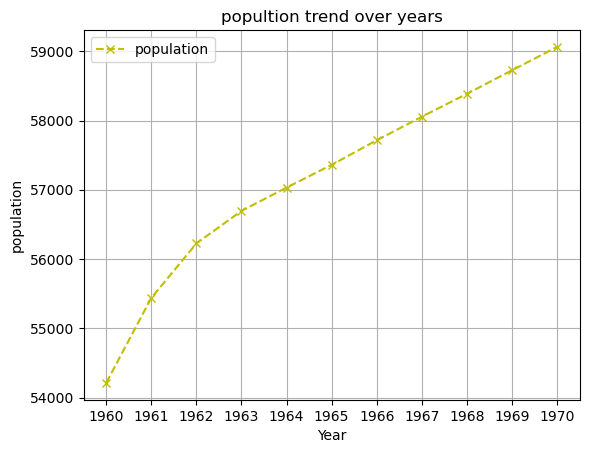

In [99]:
plt.plot(final_df["year"][:11],final_df["population"][:11],color="y",linestyle="--",marker="x",label="population")
# plt.plot(final_df["year"][:11],final_df["lifexp_rate"][:11],color="m",linestyle="-.",marker=".",label="life_ecpectency")
# plt.plot(final_df["year"][:11],final_df["Fertility_Rate"][:11],label="fertility_rate")
plt.xlabel("Year")
plt.ylabel("population")
plt.title("popultion trend over years")
plt.grid()
plt.legend()
plt.show()

## 2.	Fertility rate distribution 

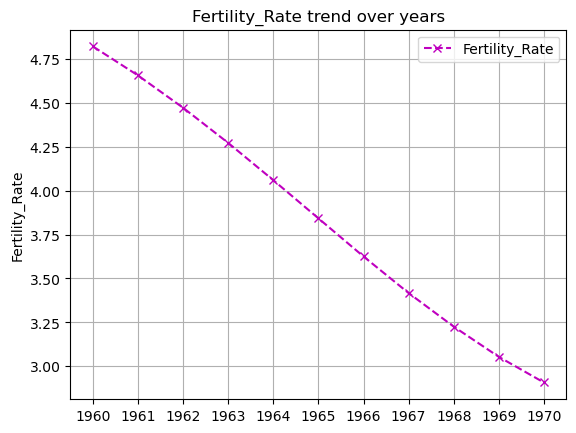

In [103]:
plt.plot(final_df["year"][:11],final_df["Fertility_Rate"][:11],color="m",linestyle="--",marker="x",label="Fertility_Rate")
plt.ylabel("Fertility_Rate")
plt.title("Fertility_Rate trend over years")
plt.grid()
plt.legend()
plt.show()

## 3.	Life expectancy variation

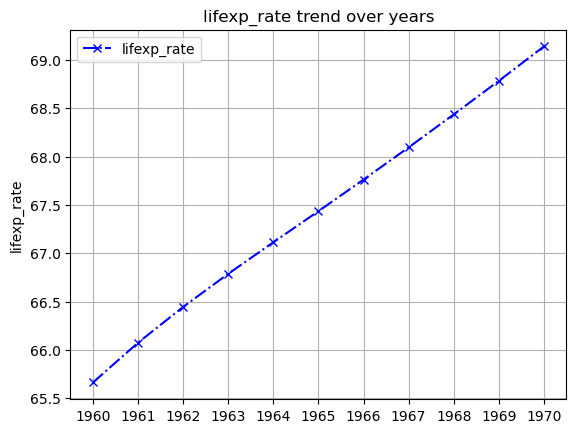

In [116]:
plt.plot(final_df["year"][:11],final_df["lifexp_rate"][:11],color="b",linestyle="-.",marker="x",label="lifexp_rate")
plt.ylabel("lifexp_rate")
plt.title("lifexp_rate trend over years")
plt.grid()
plt.legend()
plt.show()

## Regional analysis

In [108]:
import plotly.express as px

In [121]:
px.scatter (final_df,
           x="Fertility_Rate",
           y="lifexp_rate",
           hover_name="Country Code",
           animation_frame="year",
           animation_group="Country Code",
           size="population",
           color="Region",
           log_x=True,
           range_x=[1,10],
           range_y=[10,100])

In [122]:
final_df.head()

Country Code Country Name                     Region  year  population  \
0          ABW        Aruba  Latin America & Caribbean  1960     54211.0   
1          ABW        Aruba  Latin America & Caribbean  1961     55438.0   
2          ABW        Aruba  Latin America & Caribbean  1962     56225.0   
3          ABW        Aruba  Latin America & Caribbean  1963     56695.0   
4          ABW        Aruba  Latin America & Caribbean  1964     57032.0   

   lifexp_rate  Fertility_Rate  
0       65.662           4.820  
1       66.074           4.655  
2       66.444           4.471  
3       66.787           4.271  
4       67.113           4.059

In [124]:
final_df.tail()

Country Code Country Name              Region  year  population  \
14880          ZWE     Zimbabwe  Sub-Saharan Africa  2012  14710826.0   
14881          ZWE     Zimbabwe  Sub-Saharan Africa  2013  15054506.0   
14882          ZWE     Zimbabwe  Sub-Saharan Africa  2014  15411675.0   
14883          ZWE     Zimbabwe  Sub-Saharan Africa  2015  15777451.0   
14884          ZWE     Zimbabwe  Sub-Saharan Africa  2016  16150362.0   

       lifexp_rate  Fertility_Rate  
14880       56.516           3.996  
14881       58.053           3.957  
14882       59.360           3.903  
14883       60.398           3.836  
14884       61.163           3.760

In [131]:
px.scatter (final_df,
           x="population",
           y="Fertility_Rate",
           hover_name="Country Code",
           animation_frame="year",
           animation_group="Country Code",
#            size="population",
           color="Region",
#            log_y=True,
           range_y=[1,10],
           range_x=[50000,20000000])

In [137]:
filt=(final_df["year"]=="1960") & (final_df["Fertility_Rate"]>6)

In [138]:
final_df.loc[filt]

Country Code          Country Name                      Region  year  \
57             AFG           Afghanistan                  South Asia  1960   
114            AGO                Angola          Sub-Saharan Africa  1960   
171            ALB               Albania       Europe & Central Asia  1960   
285            ARB            Arab World                     Unknown  1960   
342            ARE  United Arab Emirates  Middle East & North Africa  1960   
...            ...                   ...                         ...   ...   
14543          WSM                 Samoa         East Asia & Pacific  1960   
14657          YEM           Yemen, Rep.  Middle East & North Africa  1960   
14714          ZAF          South Africa          Sub-Saharan Africa  1960   
14771          ZMB                Zambia          Sub-Saharan Africa  1960   
14828          ZWE              Zimbabwe          Sub-Saharan Africa  1960   

       population  lifexp_rate  Fertility_Rate  
57      8996351.0    32.292000        7.450000  
114     5643182.0    33.251000        7.478000  
171     1608800.0    62.279000        6.489000  
285    92490932.0    46.825065        6.948747  
342       92634.0    52.265000        6.929000  
...           ...          ...             ...  
14543    108646.0    49.748000        7.651000  
14657   5172135.0    34.361000        7.488000  
14714  17456855.0    52.215000        6.041000  
14771   3044846.0    45.124000        7.115000  
14828   3747369.0    51.565000        7.158000  

[128 rows x 7 columns]

In [154]:
px.bar(final_df,
           x="Region",
           y="population",
           animation_frame="year",
           animation_group="Country Code",
           color="Region",
           range_y=[0,2500000000])

In [144]:
 final_df['population'].max()

7444027227.0